In [1]:
import os, sys
import numpy as np
from src.model import run
from PIL import Image, ImageDraw, ImageFont
# define acllite library path
sys.path.append('../../Common/acllite')
# modules of acllite library
from acllite_model import AclLiteModel
from acllite_resource import AclLiteResource

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# define device id & model path
device_id = 0
model_path = './model/None-ResNet-None-CTC.om'
# define necessary paths and char list
path_dict = {'img_path': "../../Common/data/brands.jpg", 
            'boxes_path': "../../Common/data/DeepTextRecognition/res_test2.txt", 
            'output_path': "./results/"}
char_list = ' 0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [4]:
# initialize acllite library
acl_resource = AclLiteResource(device_id)
acl_resource.init()
print('[Device] NPU Device id:',acl_resource.device_id)
# load *.om model
model = AclLiteModel(model_path)

init resource stage:
Init resource success
[Device] NPU Device id: 0
Init model resource start...
[AclLiteModel] create model output dataset:
malloc output 0, size 3848
Create model output dataset success
Init model resource success


In [5]:
# read image
img = Image.open(path_dict['img_path'])

In [6]:
# run detection
%timeit -n 10 -r 3
bboxes = run(model,path_dict,model._model_desc,char_list)

model input size 1
input  0
model input dims ({'name': 'input', 'dimCount': 4, 'dims': [1, 1, 32, 100]}, 0)
model input datatype 0
model output size 1
output  0
model output dims ({'name': 'Add_110:0:output', 'dimCount': 3, 'dims': [1, 26, 37]}, 0)
model output datatype 0
[Model] class Model init resource stage success
[INFO] reading text boxes . . .
[INFO]  11 text boxes found.
[INFO] recognizing texts . . .
[INFO] recognition done . . .


In [7]:
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("../../Common/data/DeepTextRecognition/fonts/OpenSans_Condensed-SemiBold.ttf", 18)
s = ""

for b in bboxes:
    
    points = b.get_points()
        
    try: 
        arry_points = tuple(map(tuple, np.array(points).astype("int32").reshape([-1, 4, 2])[0]))
        draw.polygon(arry_points, outline="red")
        draw.text((points[0], points[1]-20), b.get_text(), font=font, fill='green')
        s+=b.get_text() + " "
    except:
        pass
        print(points)

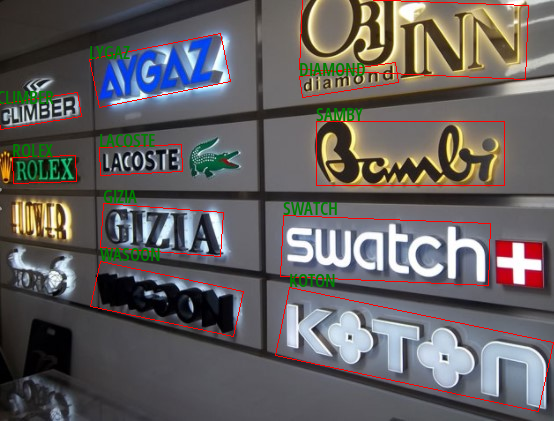

In [8]:
img

In [9]:
# show output texts
print("[Result] image texts :",s)

[Result] image texts : LYGAZ OINN DIAMOND CLIMBER LACOSTE SAMBY ROLEX GIZIA SWATCH WASOON KOTON 


In [10]:
# save results 
filename, _ = os.path.splitext(os.path.basename(path_dict['img_path']))
res_file_without_ext = path_dict['output_path'] + "res_" + filename
res_txt_file = res_file_without_ext + '.txt'
res_img_file = res_file_without_ext + '.jpg'

with open(res_txt_file, 'w') as f:
    for b in bboxes:
        f.writelines(str(b) + '\n')
        
img.save(res_img_file)